In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# np.random.seed(0)

In [2]:
conn = sqlite3.Connection('Northwind_small.sqlite')
cur = conn.cursor()

In [3]:
cur.execute('''SELECT *
                FROM OrderDetail;''')
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [4]:
df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [5]:
no_discount = df.loc[df['Discount'] == 0]
discount = df.loc[df['Discount']!= 0]
discount.info()
print('**************************')
no_discount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 6 to 2152
Data columns (total 6 columns):
Id           838 non-null object
OrderId      838 non-null int64
ProductId    838 non-null int64
UnitPrice    838 non-null float64
Quantity     838 non-null int64
Discount     838 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.8+ KB
**************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 2154
Data columns (total 6 columns):
Id           1317 non-null object
OrderId      1317 non-null int64
ProductId    1317 non-null int64
UnitPrice    1317 non-null float64
Quantity     1317 non-null int64
Discount     1317 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 72.0+ KB


In [6]:
def get_sample(data, n):
    return list(data.sample(n, replace = False))
    pass
def get_sample_mean(sample):
    return np.mean(sample)
    pass
def create_sample_distribution(data, dist_size=100, n=30):
    sample_means = []
    for i in range(dist_size):
        to_mean = get_sample(data, n)
        sample_means.append(get_sample_mean(to_mean))
    return sample_means
    pass

In [7]:
qty_no_discount = no_discount['Quantity']
qty_discount = discount['Quantity']

Text(0, 0.5, 'Quantity Probability')

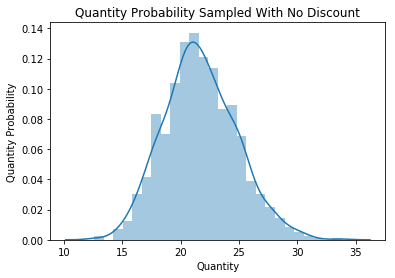

In [8]:
no_discount_sample = create_sample_distribution(qty_no_discount,dist_size=1000,n=30)
sns.distplot(no_discount_sample)
plt.title('Quantity Probability Sampled With No Discount')
plt.xlabel('Quantity')
plt.ylabel('Quantity Probability')

Text(0, 0.5, 'Quantity Probability')

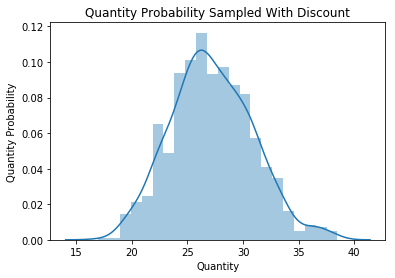

In [9]:
with_discount_sample = create_sample_distribution(qty_discount,dist_size=1000,n=30)
sns.distplot(with_discount_sample)
plt.title('Quantity Probability Sampled With Discount')
plt.xlabel('Quantity')
plt.ylabel('Quantity Probability')

In [10]:
sample_mean = np.mean(with_discount_sample)
sample_std = np.std(with_discount_sample)

sample_mean_nodisc = np.mean(no_discount_sample)
sample_std_nodisc = np.std(no_discount_sample)

print(sample_mean, sample_std)
print(sample_mean_nodisc, sample_std_nodisc)

27.197599999999998 3.671375887411512
21.675333333333334 3.1027153699085366


In [18]:
print(df['Quantity'].describe())
print(qty_no_discount.describe())
print(qty_discount.describe())

count    2155.000000
mean       23.812993
std        19.022047
min         1.000000
25%        10.000000
50%        20.000000
75%        30.000000
max       130.000000
Name: Quantity, dtype: float64
count    1317.000000
mean       21.715262
std        17.507493
min         1.000000
25%        10.000000
50%        18.000000
75%        30.000000
max       130.000000
Name: Quantity, dtype: float64
count    838.000000
mean      27.109785
std       20.771439
min        1.000000
25%       12.000000
50%       20.000000
75%       36.000000
max      130.000000
Name: Quantity, dtype: float64


hypothesis test:

null hypothesis: the mean with a discount is the same as a mean without a discount 
alternative hypothesis: the mean with a discount is different than the mean without any discount


In [11]:
discount = df['Discount']
qty = df['Quantity']

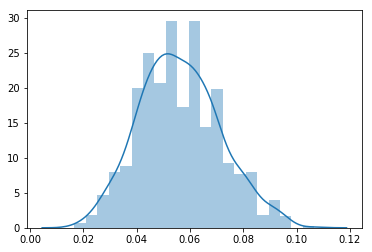

In [12]:
discount_sample = create_sample_distribution(discount,dist_size=1000,n=30)
sns.distplot(discount_sample)

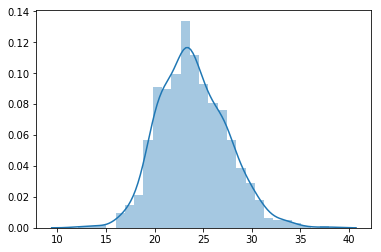

In [13]:
qty_sample = create_sample_distribution(qty, dist_size=1000, n=30)
sns.distplot(qty_sample)